In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import gc

from matplotlib import rcParams
rcParams['axes.titlepad'] = 25
rcParams['font.weight'] ='bold'

In [2]:
# trend of water vapor
SH_data = pd.ExcelFile("../data/PV_O3_SH.xlsx").parse("SH_dec")

In [3]:
SH_data["SH_dec"].shape[0]

37

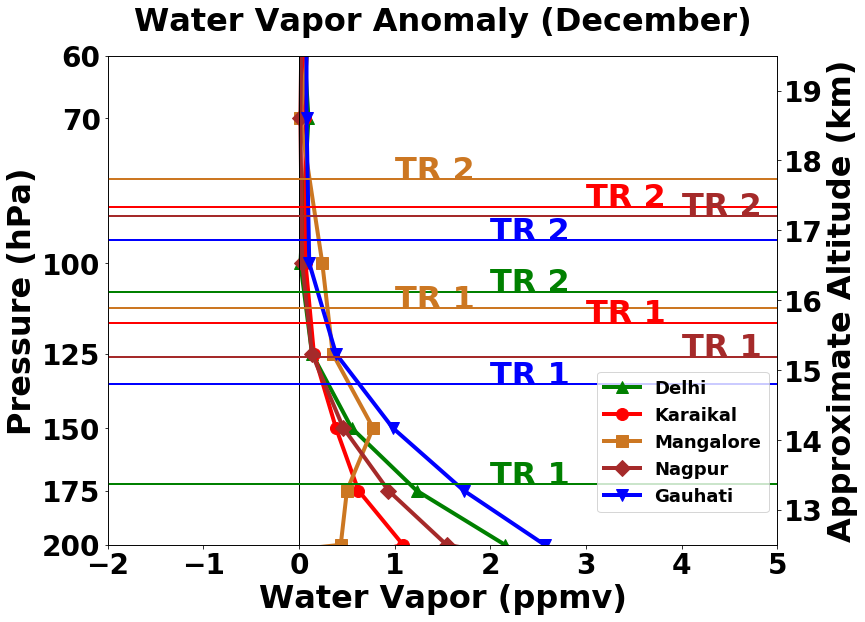

In [4]:
# http://scipy-cookbook.readthedocs.io/items/Matplotlib_CustomLogLabels.html
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

fig, ax = plt.subplots(figsize=(12,9))

LINE_WIDTH = 4.0
plt.plot(SH_data["Delhi"], 
         SH_data["SH_dec"],
         label='Delhi',
         color='green', 
         linewidth=LINE_WIDTH,
         marker='^',
         markersize=12
        )

plt.plot(SH_data["Karaikal"], 
         SH_data["SH_dec"],
         label='Karaikal',
         color='red', 
         linewidth=LINE_WIDTH,
         marker='o',
         markersize=12
        )

plt.plot(SH_data["Mangalore"], 
         SH_data["SH_dec"],
         label='Mangalore',
         color='#CC7722', 
         linewidth=LINE_WIDTH,
         marker='s',
         markersize=12
        )

plt.plot(SH_data["Nagpur"], 
         SH_data["SH_dec"],
         label='Nagpur',
         color='brown', 
         linewidth=LINE_WIDTH,
         marker='D',
         markersize=12
        )

plt.plot(SH_data["Gauhati"], 
         SH_data["SH_dec"],
         label='Gauhati',
         color='blue', 
         linewidth=LINE_WIDTH, 
         marker='v',
         markersize=12
        )

TICKS_FONT_SIZE = 28
plt.axvline(x=0, color='black', linewidth=1)
plt.xlim(-2, 5)
plt.xticks(fontsize=TICKS_FONT_SIZE)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

ax.set_yticks(np.arange(SH_data["SH_dec"].shape[0]))
# ax.set_yticklabels(SH_data["SH_Aug"])
# ax.yaxis.set_minor_locator(plt.LogLocator())
# ax.yaxis.set_minor_formatter(plt.LogFormatter())
ax.set_yscale('log')
ax.set_ylim([60, 200])
ax.invert_yaxis()
ax.tick_params(labelsize=TICKS_FONT_SIZE)
ax.yaxis.set_major_formatter(plt.FuncFormatter(log_10_product))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(log_10_product))
ax.set_yticks([60, 70, 100, 125, 150, 175, 200])
plt.minorticks_off()

# create new axis on the right
ax2 = ax.twinx()
ax2.set_yscale('linear')
ax2.set_ylim([12.5, 19.5])
ax2.tick_params(labelsize=TICKS_FONT_SIZE)

# adjust height axis
# tick_spacing = 0.0148
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# labels = np.arange(125,200)/10.0
# labels = labels.tolist()
# for index, label in enumerate(labels):
#     if index%5 == 0:
#         labels[index] = str(label)
#     else:
#         labels[index] = ""
# ax2.yaxis.set_ticklabels(labels, fontsize=TICKS_FONT_SIZE)

# start, end = ax2.get_ylim()
# ax2.yaxis.set_ticks(np.arange(start, end, 0.7))
# every_nth = 5
# for n, label in enumerate(ax2.yaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)

# ax2.yscale('linear')
# ax2.yaxis.set_data_interval(5)
# set_ylim(ylimits=(0, 20))


# show TR1 and TR2
LINE_WIDTH = 2.0
FONT_SIZE = 32
# delhi
ax2.axhline(y=13.37, color='green', linewidth=LINE_WIDTH)
ax2.axhline(y=16.12, color='green', linewidth=LINE_WIDTH)
plt.text(2, 13.37, 'TR 1', color='green', fontsize=FONT_SIZE)
plt.text(2, 16.12, 'TR 2', color='green', fontsize=FONT_SIZE)

# gauhati
ax2.axhline(y=14.80, color='blue', linewidth=LINE_WIDTH)
ax2.axhline(y=16.86, color='blue', linewidth=LINE_WIDTH)
plt.text(2, 14.80, 'TR 1', color='blue', fontsize=FONT_SIZE)
plt.text(2, 16.86, 'TR 2', color='blue', fontsize=FONT_SIZE)

# nagpur
ax2.axhline(y=15.19, color='brown', linewidth=LINE_WIDTH)
ax2.axhline(y=17.21, color='brown', linewidth=LINE_WIDTH)
plt.text(4, 15.19, 'TR 1', color='brown', fontsize=FONT_SIZE)
plt.text(4, 17.21, 'TR 2', color='brown', fontsize=FONT_SIZE)

# mangalore
ax2.axhline(y=15.89, color='#CC7722', linewidth=LINE_WIDTH)
ax2.axhline(y=17.73, color='#CC7722', linewidth=LINE_WIDTH)
plt.text(1, 15.89, 'TR 1', color='#CC7722', fontsize=FONT_SIZE)
plt.text(1, 17.73, 'TR 2', color='#CC7722', fontsize=FONT_SIZE)

# karaikal
ax2.axhline(y=15.68, color='red', linewidth=LINE_WIDTH)
ax2.axhline(y=17.34, color='red', linewidth=LINE_WIDTH)
plt.text(3, 15.68, 'TR 1', color='red', fontsize=FONT_SIZE)
plt.text(3, 17.34, 'TR 2', color='red', fontsize=FONT_SIZE)

FONT_SIZE = 32
ax.set_xlabel('Water Vapor (ppmv)', fontsize=FONT_SIZE, fontweight="bold")
ax.set_ylabel('Pressure (hPa)', fontsize=FONT_SIZE, fontweight="bold")
ax2.set_ylabel('Approximate Altitude (km)', fontsize=FONT_SIZE, fontweight="bold")
plt.title('Water Vapor Anomaly (December)', fontsize=FONT_SIZE, fontweight="bold")
fig.legend(bbox_to_anchor=(0.90, 0.4), fontsize=18)

# plt.show()
plt.savefig('../plots/watervapor_dec_anom.png')

In [5]:
gc.collect()

235

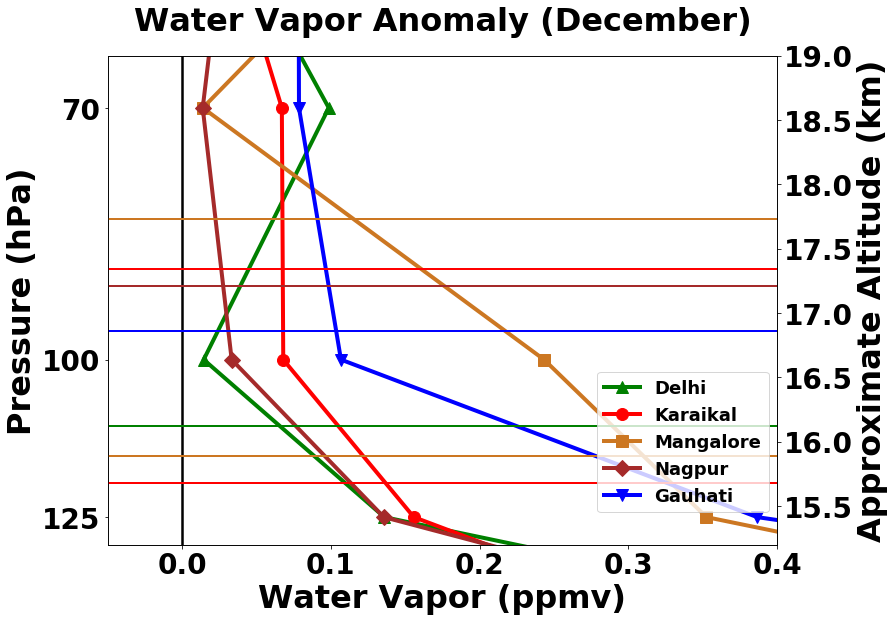

In [9]:
# http://scipy-cookbook.readthedocs.io/items/Matplotlib_CustomLogLabels.html
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

fig, ax = plt.subplots(figsize=(12,9))

LINE_WIDTH = 4.0
plt.plot(SH_data["Delhi"], 
         SH_data["SH_dec"],
         label='Delhi',
         color='green', 
         linewidth=LINE_WIDTH,
         marker='^',
         markersize=12
        )

plt.plot(SH_data["Karaikal"], 
         SH_data["SH_dec"],
         label='Karaikal',
         color='red', 
         linewidth=LINE_WIDTH,
         marker='o',
         markersize=12
        )

plt.plot(SH_data["Mangalore"], 
         SH_data["SH_dec"],
         label='Mangalore',
         color='#CC7722', 
         linewidth=LINE_WIDTH,
         marker='s',
         markersize=12
        )

plt.plot(SH_data["Nagpur"], 
         SH_data["SH_dec"],
         label='Nagpur',
         color='brown', 
         linewidth=LINE_WIDTH,
         marker='D',
         markersize=12
        )

plt.plot(SH_data["Gauhati"], 
         SH_data["SH_dec"],
         label='Gauhati',
         color='blue', 
         linewidth=LINE_WIDTH, 
         marker='v',
         markersize=12
        )

TICKS_FONT_SIZE = 28
plt.axvline(x=0, color='black', linewidth=2.5)
plt.xlim(-0.05, 0.4)
plt.xticks(fontsize=TICKS_FONT_SIZE)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

ax.set_yticks(np.arange(SH_data["SH_dec"].shape[0]))
# ax.set_yticklabels(SH_data["SH_Aug"])
# ax.yaxis.set_minor_locator(plt.LogLocator())
# ax.yaxis.set_minor_formatter(plt.LogFormatter())
ax.set_yscale('log')
ax.set_ylim([65, 130])
ax.invert_yaxis()
ax.tick_params(labelsize=TICKS_FONT_SIZE)
ax.yaxis.set_major_formatter(plt.FuncFormatter(log_10_product))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(log_10_product))
ax.set_yticks([70, 100, 125])
plt.minorticks_off()

# create new axis on the right
ax2 = ax.twinx()
ax2.set_yscale('linear')
ax2.set_ylim([15.2, 19.0])
ax2.tick_params(labelsize=TICKS_FONT_SIZE)

# adjust height axis
# tick_spacing = 0.0148
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# labels = np.arange(125,200)/10.0
# labels = labels.tolist()
# for index, label in enumerate(labels):
#     if index%5 == 0:
#         labels[index] = str(label)
#     else:
#         labels[index] = ""
# ax2.yaxis.set_ticklabels(labels, fontsize=TICKS_FONT_SIZE)

# start, end = ax2.get_ylim()
# ax2.yaxis.set_ticks(np.arange(start, end, 0.7))
# every_nth = 5
# for n, label in enumerate(ax2.yaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)

# ax2.yscale('linear')
# ax2.yaxis.set_data_interval(5)
# set_ylim(ylimits=(0, 20))


# show TR1 and TR2
LINE_WIDTH = 2.0
FONT_SIZE = 32
# delhi
ax2.axhline(y=13.37, color='green', linewidth=LINE_WIDTH)
ax2.axhline(y=16.12, color='green', linewidth=LINE_WIDTH)
# plt.text(2, 13.37, 'TR 1', color='green', fontsize=FONT_SIZE)
# plt.text(2, 16.12, 'TR 2', color='green', fontsize=FONT_SIZE)

# gauhati
ax2.axhline(y=14.80, color='blue', linewidth=LINE_WIDTH)
ax2.axhline(y=16.86, color='blue', linewidth=LINE_WIDTH)
# plt.text(2, 14.80, 'TR 1', color='blue', fontsize=FONT_SIZE)
# plt.text(2, 16.86, 'TR 2', color='blue', fontsize=FONT_SIZE)

# nagpur
ax2.axhline(y=15.19, color='brown', linewidth=LINE_WIDTH)
ax2.axhline(y=17.21, color='brown', linewidth=LINE_WIDTH)
# plt.text(4, 15.19, 'TR 1', color='brown', fontsize=FONT_SIZE)
# plt.text(4, 17.21, 'TR 2', color='brown', fontsize=FONT_SIZE)

# mangalore
ax2.axhline(y=15.89, color='#CC7722', linewidth=LINE_WIDTH)
ax2.axhline(y=17.73, color='#CC7722', linewidth=LINE_WIDTH)
# plt.text(1, 15.89, 'TR 1', color='#CC7722', fontsize=FONT_SIZE)
# plt.text(1, 17.73, 'TR 2', color='#CC7722', fontsize=FONT_SIZE)

# karaikal
ax2.axhline(y=15.68, color='red', linewidth=LINE_WIDTH)
ax2.axhline(y=17.34, color='red', linewidth=LINE_WIDTH)
# plt.text(3, 15.68, 'TR 1', color='red', fontsize=FONT_SIZE)
# plt.text(3, 17.34, 'TR 2', color='red', fontsize=FONT_SIZE)

FONT_SIZE = 32
ax.set_xlabel('Water Vapor (ppmv)', fontsize=FONT_SIZE, fontweight="bold")
ax.set_ylabel('Pressure (hPa)', fontsize=FONT_SIZE, fontweight="bold")
ax2.set_ylabel('Approximate Altitude (km)', fontsize=FONT_SIZE, fontweight="bold")
plt.title('Water Vapor Anomaly (December)', fontsize=FONT_SIZE, fontweight="bold")
fig.legend(bbox_to_anchor=(0.90, 0.4), fontsize=18)

# plt.show()
plt.savefig('../plots/watervapor_inset_dec_anom.png', bbox_inches='tight', pad_inches = 0.5, dpi = 200)

In [7]:
gc.collect()

7754